In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Reading the data.

In [2]:
housing=pd.read_csv("D:\\PYTHON_MAIN_COURSE(IIIT-Bnglr)\\COURSE-4-ML_PRED-ANALYSIS-2\\ASSIGNMENT\\train.csv")

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
round(housing.isnull().sum()/len(housing)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [7]:
housing.shape

(1460, 81)

In [8]:
housing=housing.drop(['Id','LotFrontage'],axis=1)

In [9]:
(round(housing.isnull().sum()/len(housing)*100,2)).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
ExterQual         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [10]:
housing.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analysing missing values

In [11]:
housing['GarageYrBlt']. replace (np.NaN, housing['GarageYrBlt'].median(), inplace=True)

In [12]:
housing['MasVnrArea']. replace (np.NaN, housing['MasVnrArea'].median(), inplace=True)

In [13]:
null_df=["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", 
         "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [14]:
for i in null_df:
    housing[i].fillna("none",inplace=True)

In [15]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## UNIVARIATE ANALYSIS

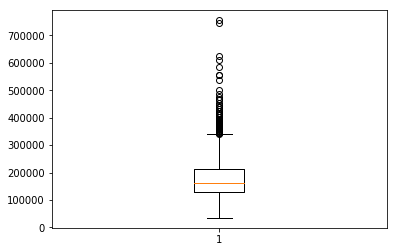

In [16]:
plt.boxplot(housing['SalePrice'])
plt.show()

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


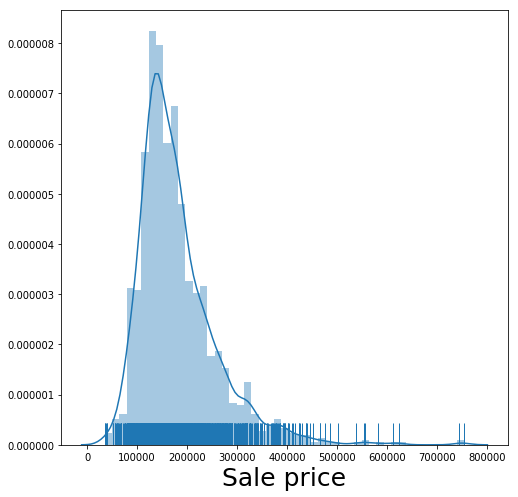

In [17]:
plt.figure(figsize=(8,8))
sns.distplot(housing['SalePrice'],rug=True)
plt.xlabel("Sale price",fontsize=25)
plt.show()

In [18]:
print("Skewness: %f" % housing['SalePrice'].skew())
print("Kurtosis: %f" % housing['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


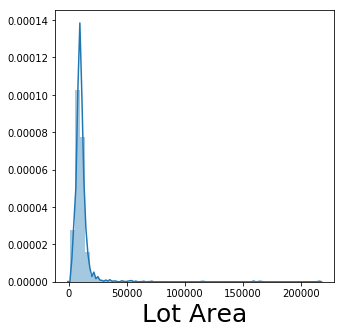

maximum homes have 10516.83  sq ft size


In [19]:
plt.figure(figsize=(5,5))
sns.distplot(housing['LotArea'])
plt.xlabel("Lot Area",fontsize=25)
plt.show()
print("maximum homes have",round(housing['LotArea'].mean(),2)," sq ft size")

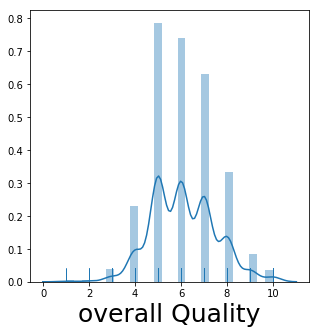

In [20]:
plt.figure(figsize=(5,5))
sns.distplot(housing['OverallQual'],rug=True)
plt.xlabel("overall Quality",fontsize=25)
plt.show()

## max homes have average condition overall

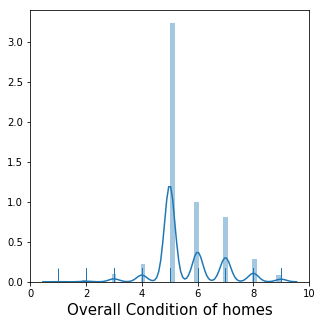

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(housing['OverallCond'],rug=True)
plt.xlabel("Overall Condition of homes",fontsize=15)
plt.show()

## Maximum have avg condition.

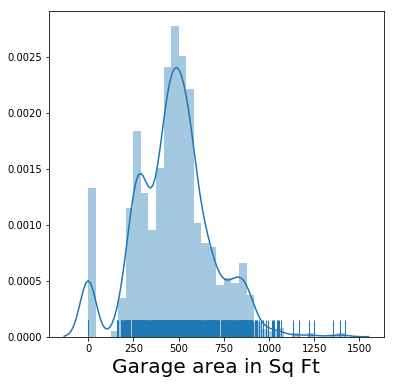

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(housing['GarageArea'],rug=True)
plt.xlabel("Garage area in Sq Ft",fontsize=20)
plt.show()

No handles with labels found to put in legend.


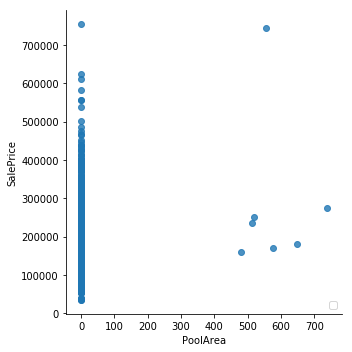

In [23]:
sns.lmplot(x='PoolArea', y='SalePrice', data=housing, fit_reg=False,legend=False)
plt.legend(loc='lower right')


## max price is for homes with street  of 50-150 ft connected to them.

No handles with labels found to put in legend.


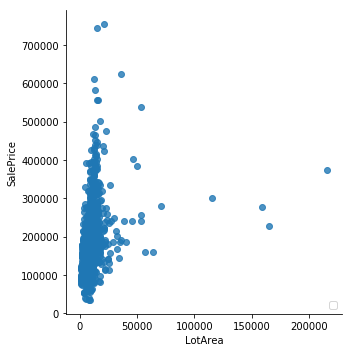

In [24]:
sns.lmplot(x='LotArea', y='SalePrice', data=housing, fit_reg=False,legend=False)
plt.legend(loc='lower right')


No handles with labels found to put in legend.


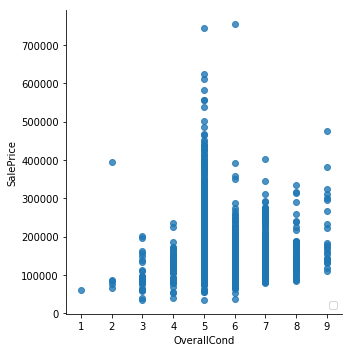

In [25]:
sns.lmplot(x='OverallCond', y='SalePrice', data=housing ,fit_reg=False,legend=False)
plt.legend(loc='lower right')


No handles with labels found to put in legend.


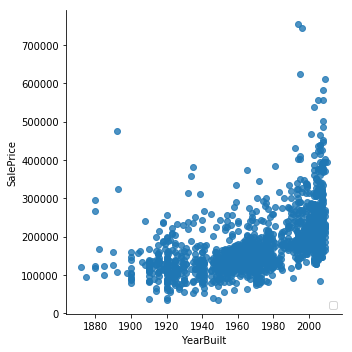

In [26]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=housing ,fit_reg=False,legend=False)
plt.legend(loc='lower right')


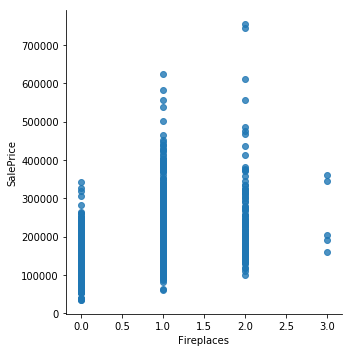

In [27]:
sns.lmplot(x='Fireplaces', y='SalePrice', data=housing ,fit_reg=False,legend=False)



## Homes with 2 fireplaces score the most when it comes to price.

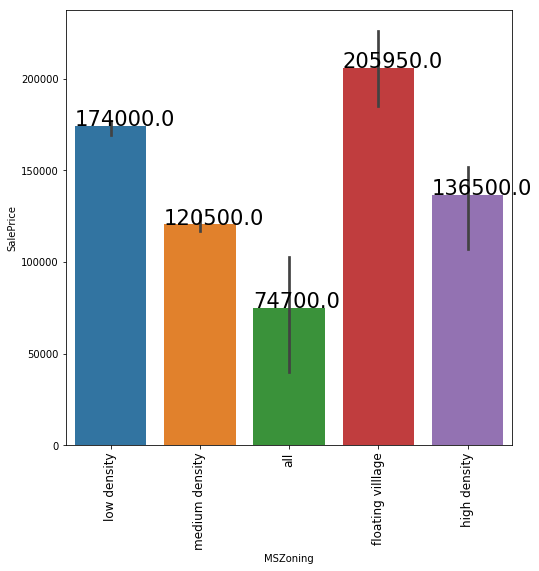

In [28]:
plt.figure(figsize=(8,8))
fig1=sns.barplot(x='MSZoning',y='SalePrice',estimator=np.median,data= housing)
fig1.set_xticklabels(['low density','medium density','all','floating villlage','high density' ],rotation=90,fontsize=12)
for i in fig1.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig1.text(i.get_x()+.00, i.get_height()+120, \
            str(round((i.get_height()), 0)), fontsize=21, color='black',
                rotation=0)
plt.show()

## Floating villages are most expensive.

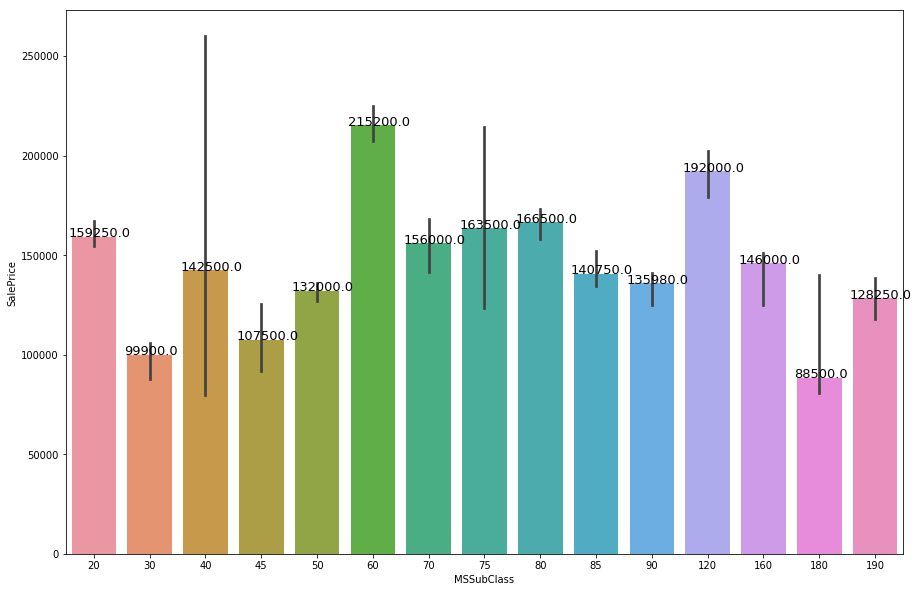

In [29]:
plt.figure(figsize=(15,10))
fig2=sns.barplot(x='MSSubClass',y='SalePrice',estimator=np.median,data= housing)
for i in fig2.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig2.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=13, color='black',
                rotation=0)
plt.show()

## 2 storey 1946 and newer are the most expensive homes.

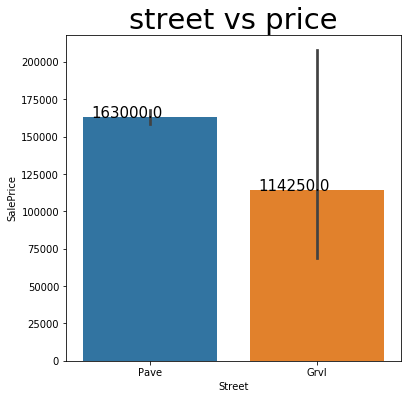

In [30]:
plt.figure(figsize=(6,6))
fig3=sns.barplot(x='Street',y='SalePrice',estimator=np.median,data= housing)
plt.title("street vs price",fontsize=29)
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()+.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)


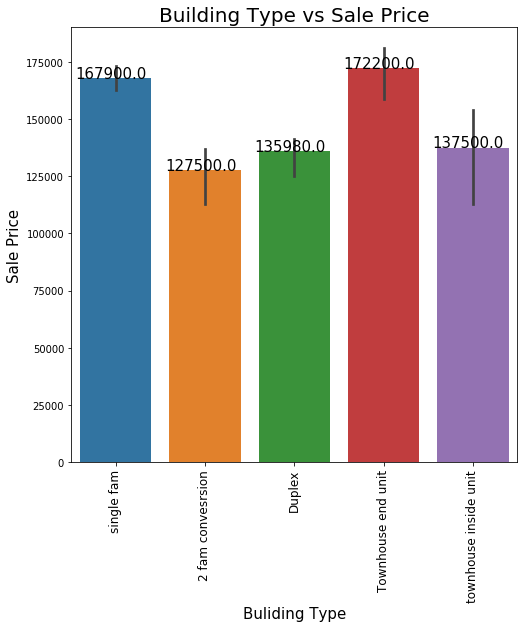

In [31]:
plt.figure(figsize=(8,8))
fig3=sns.barplot(x='BldgType',y='SalePrice',estimator=np.median,data= housing)
fig3.set_xticklabels(['single fam','2 fam convesrsion','Duplex','Townhouse end unit','townhouse inside unit' ],rotation=90,fontsize=12)
plt.xlabel("Buliding Type",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Building Type vs Sale Price",fontsize=20)
for i in fig3.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

## Townhouse end units homes are most expensive.

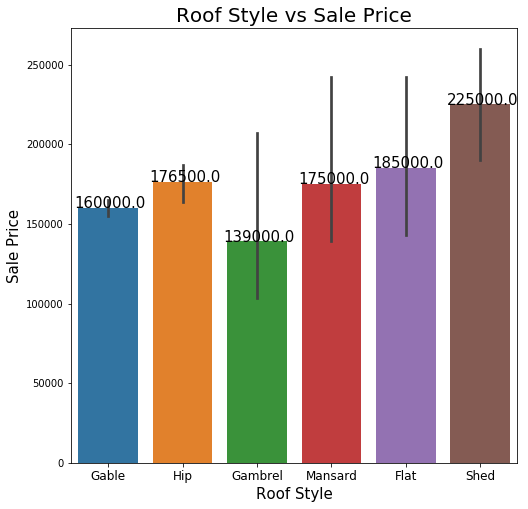

In [32]:
plt.figure(figsize=(8,8))
fig4=sns.barplot(x='RoofStyle',y='SalePrice',estimator=np.median,data= housing)
plt.xticks(fontsize=12)
plt.xlabel("Roof Style",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Roof Style vs Sale Price",fontsize=20)
for i in fig4.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig4.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

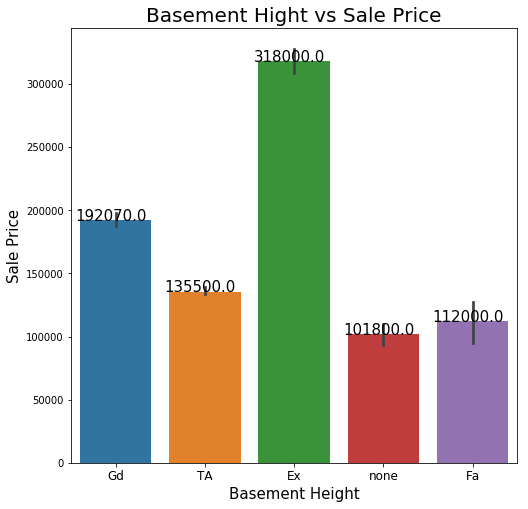

In [33]:
plt.figure(figsize=(8,8))
fig5=sns.barplot(x='BsmtQual',y='SalePrice',estimator=np.median,data= housing)
plt.xticks(fontsize=12)
plt.xlabel("Basement Height",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Basement Hight vs Sale Price",fontsize=20)
for i in fig5.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig5.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

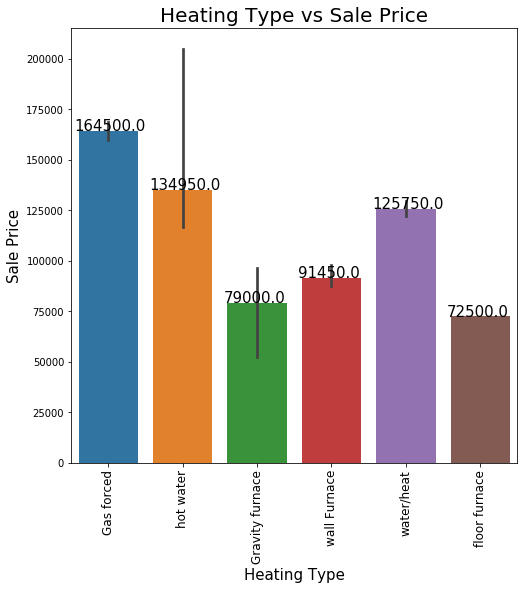

In [34]:
plt.figure(figsize=(8,8))
fig6=sns.barplot(x='Heating',y='SalePrice',estimator=np.median,data= housing)
fig6.set_xticklabels(['Gas forced','hot water','Gravity furnace','wall Furnace','water/heat','floor furnace' ],rotation=90,fontsize=12)

plt.xticks(fontsize=12)
plt.xlabel("Heating Type",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.title("Heating Type vs Sale Price",fontsize=20)
for i in fig6.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig6.text(i.get_x()-.05, i.get_height()+0, \
            str(round((i.get_height()), 0)), fontsize=15, color='black',
                rotation=0)
plt.show()

## Homes which use  forced  gas warm air furnace type of heating  are the most expensive.

# Examinig numerical features.

In [35]:
numeric_cols=housing.select_dtypes(include=[np.number])
numeric_cols.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## Finding Missing values.

In [36]:
total=numeric_cols.isnull().sum().sort_values(ascending=False)
percent=round(((numeric_cols.isnull().sum()/housing.shape[0])*100),2).sort_values(ascending=False)
missing=pd.concat([total,percent], axis=1, join='outer', keys=['Total Missing Values','% of Missing data'])
missing.index.name='features'
missing.head(10)

,Total Missing Values,% of Missing data
features,,
SalePrice,0,0.0
YrSold,0,0.0
BsmtFullBath,0,0.0
GrLivArea,0,0.0
LowQualFinSF,0,0.0
2ndFlrSF,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
BsmtUnfSF,0,0.0


## Examinig unique values.

In [37]:
numeric_cols.apply(pd.Series.nunique)

MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [38]:
numeric_cols=numeric_cols.loc[:,numeric_cols.nunique()!=1]


## Examining categorical features.

In [39]:
categ_cols=housing.select_dtypes(include=[np.object])
categ_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


## Finding missing values.

In [40]:
total=categ_cols.isnull().sum().sort_values(ascending=False)
percent=round(((categ_cols.isnull().sum()/housing.shape[0])*100),2).sort_values(ascending=False)
missing_cat=pd.concat([total,percent], axis=1, join='outer', keys=['Total Missing Values','% of Missing data'])
missing_cat.index.name='features'
missing_cat.head(10)


,Total Missing Values,% of Missing data
features,,
MasVnrType,8,0.55
Electrical,1,0.07
SaleCondition,0,0.00
Foundation,0,0.00
ExterQual,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00
RoofStyle,0,0.00


In [41]:
housing['PoolQC'].fillna('none',inplace=True)

## Finding unique values.

In [42]:
categ_cols.apply(pd.Series.nunique)

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

## Analysing correlations with target variable.

In [43]:
correl=numeric_cols.corr()
print(correl['SalePrice'].sort_values(ascending=False,),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 




## Plotting heatmap for correlations.

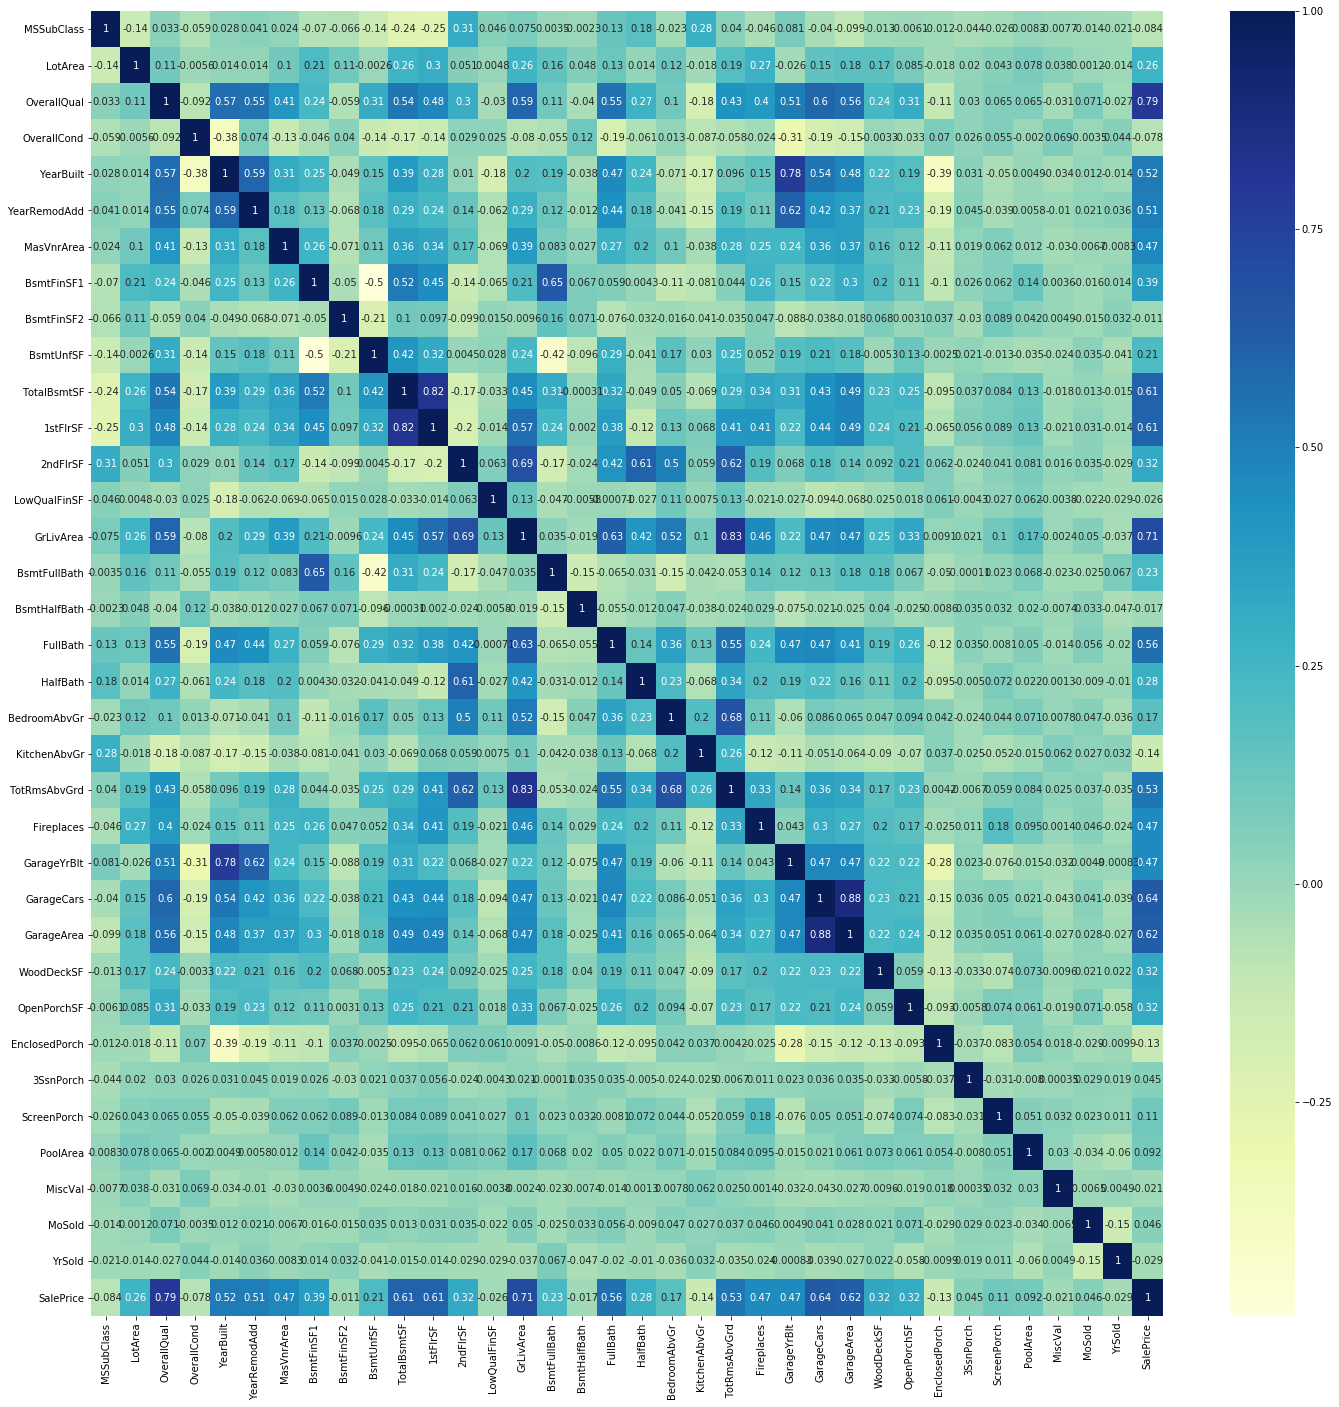

In [44]:
plt.figure(figsize=(24,24))
corrmat=housing.corr()
sns.heatmap(corrmat,cmap='YlGnBu',annot=True)
plt.show()

## Zoomed Heatmap.

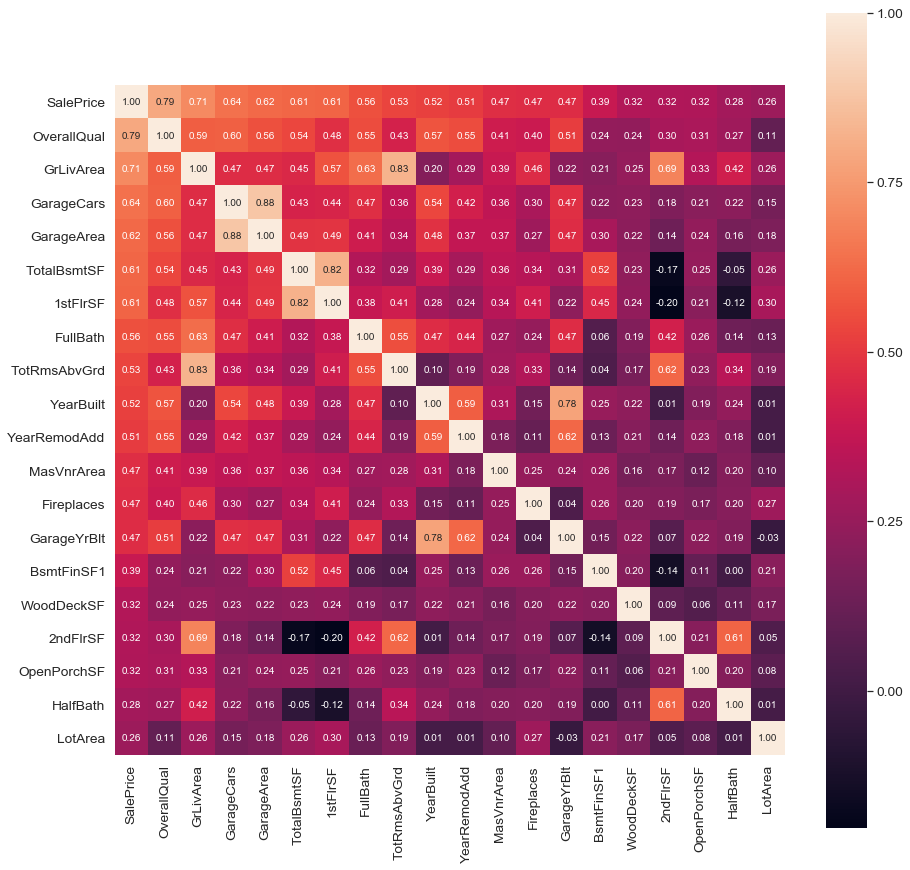

In [45]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## It is evident from here that columns 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' are highly  correlated with 'Sale Price'.

# Pairplots and scatter plots with highly correlated coulmns.

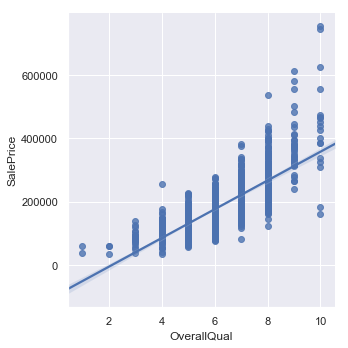

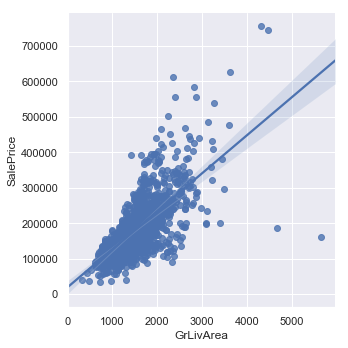

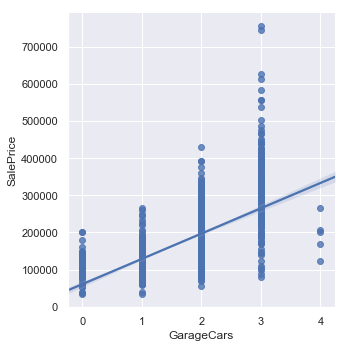

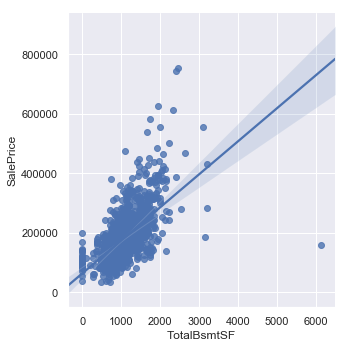

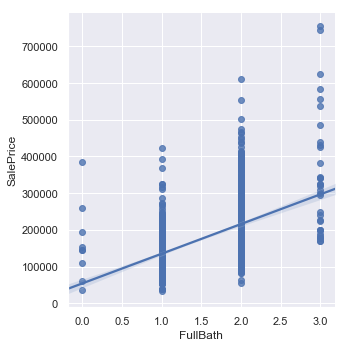

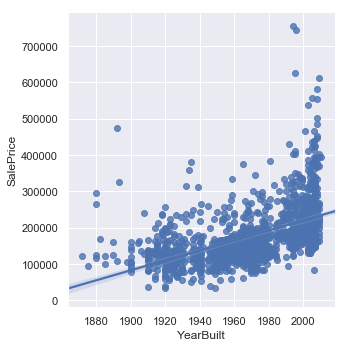

In [46]:
sns.set()
colz = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for col in colz:
    sns.lmplot(col,'SalePrice',data=housing)
plt.show()

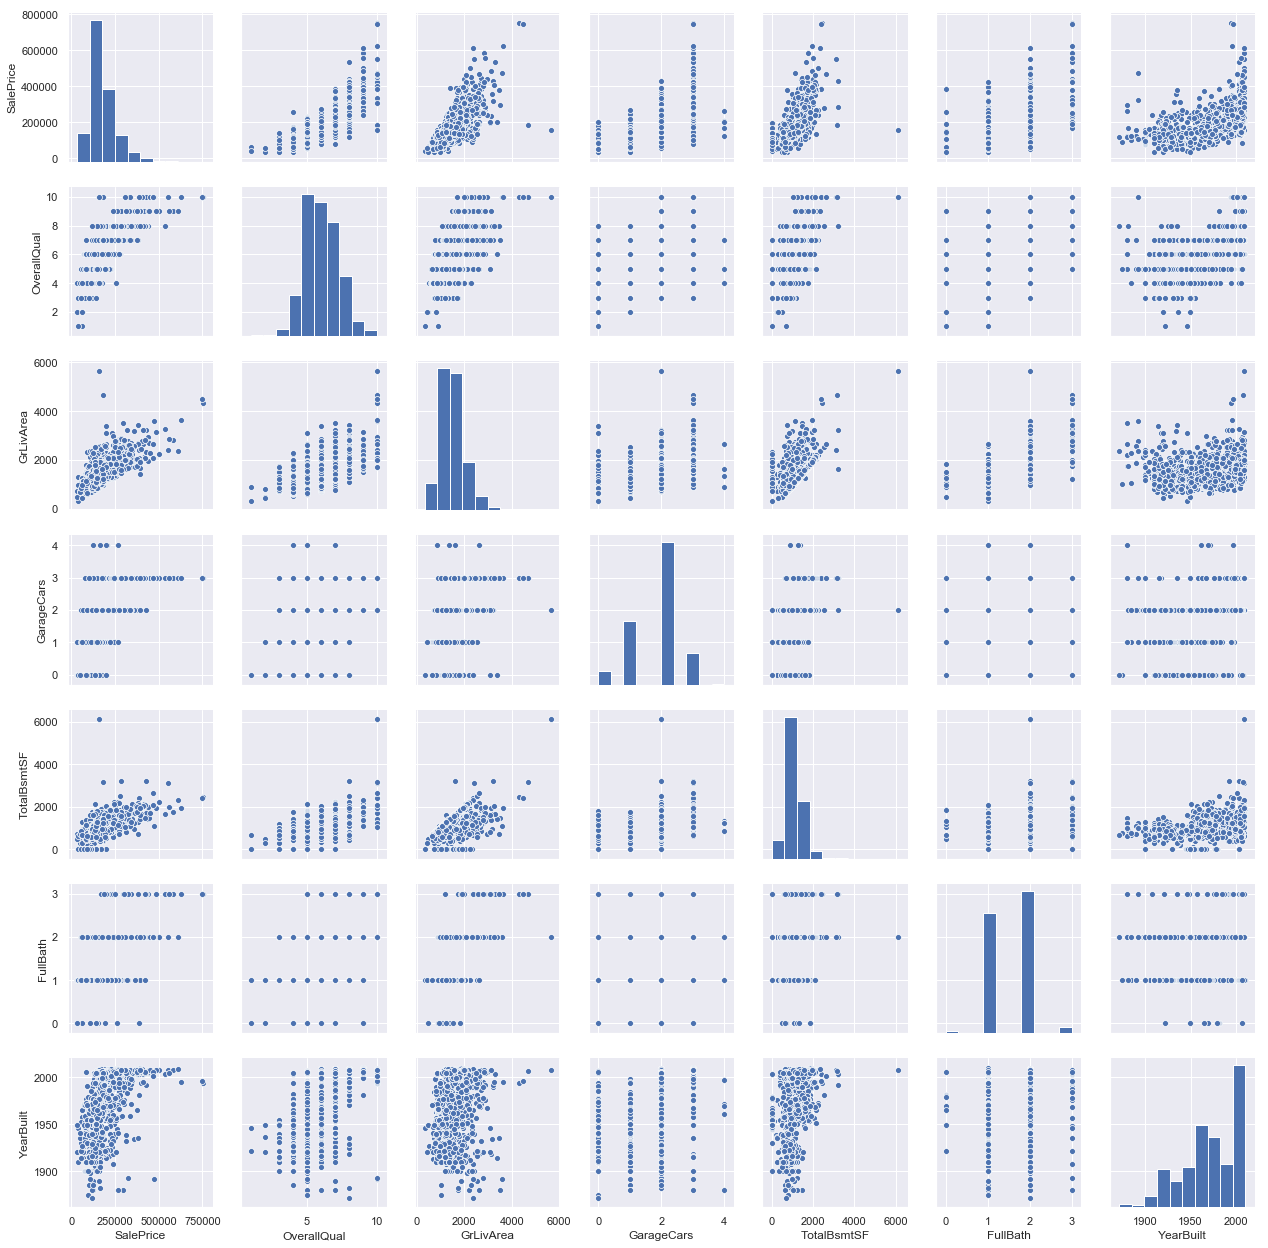

In [47]:
sns.set()
columns=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[columns])
plt.show()

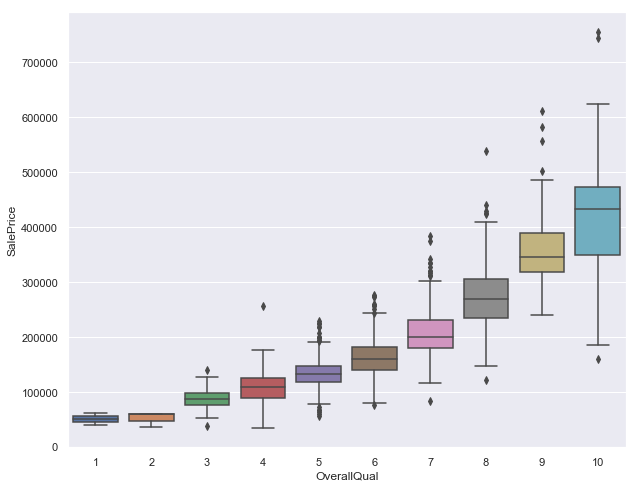

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(x='OverallQual',y='SalePrice',data=housing)
plt.show()

#####  clearly a positive correlation exists between sale price and overall quality

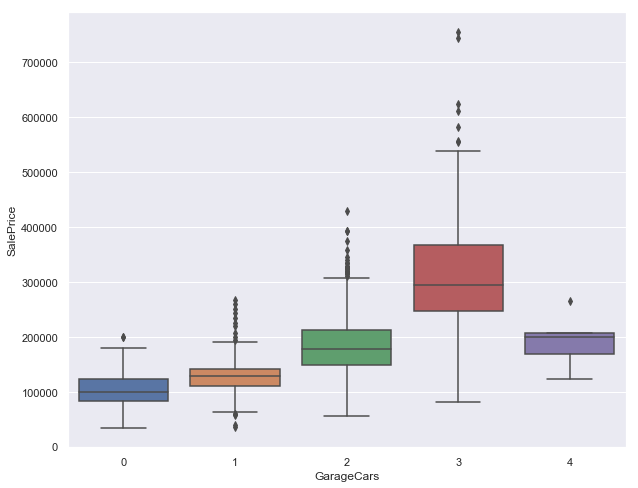

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=housing)
plt.show()

## Removing Outliers.

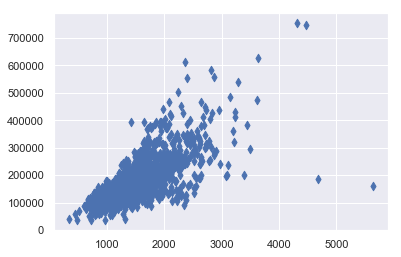

In [50]:
plt.scatter(housing.GrLivArea,housing.SalePrice,c='b',marker='d')
plt.show()

In [51]:
housing=housing[housing['GrLivArea']<4000]

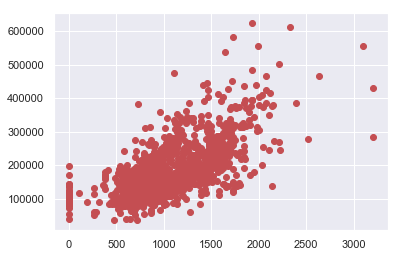

In [52]:
plt.scatter(housing.TotalBsmtSF ,housing.SalePrice,c='r',marker='o')
plt.show()

In [53]:
housing=housing[housing.TotalBsmtSF<3000]

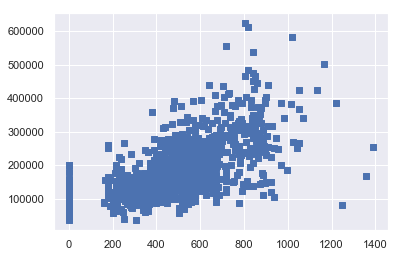

In [54]:
plt.scatter(housing.GarageArea ,housing.SalePrice,c='b',marker='s')
plt.show()

In [55]:
housing=housing[housing['GarageArea']<1200]

In [56]:
housing.shape

(1449, 79)

## probablity and normal probablity plot for Sale Price.

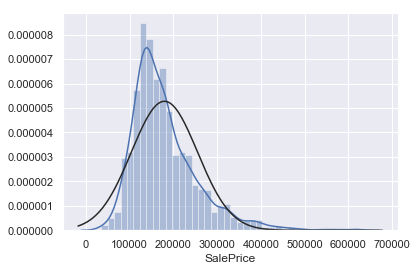

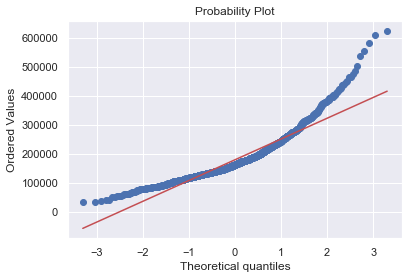

In [57]:
sns.distplot(housing['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['SalePrice'], plot=plt)

### It can be seen here that the sale price column is not normally distributed,so transforming it before regression.

In [58]:
housing['SalePrice']=np.log(housing['SalePrice'])

## Tranformed histogram and  Probablity plot for sale price.

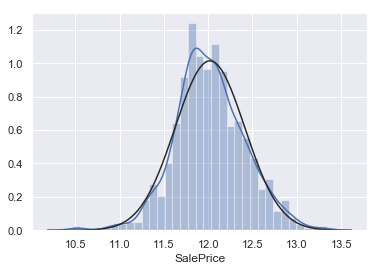

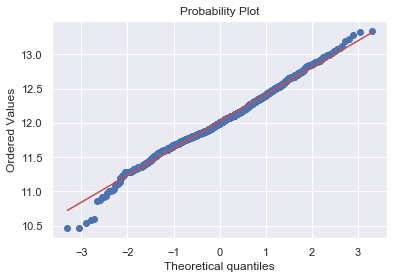

In [59]:
sns.distplot(housing['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['SalePrice'], plot=plt)

## repeating it for other variables.

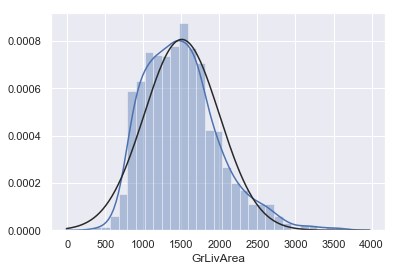

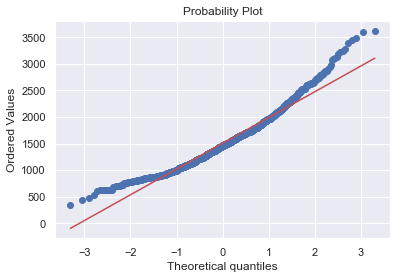

In [60]:
sns.distplot(housing['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['GrLivArea'], plot=plt)

In [61]:
housing['GrLivArea']=np.log(housing['GrLivArea'])

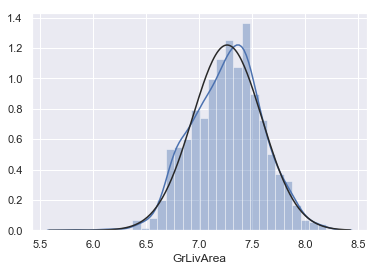

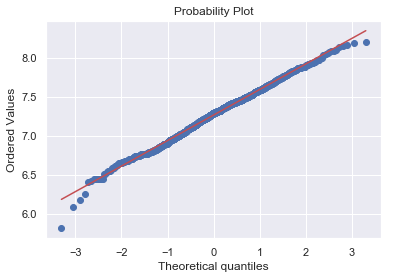

In [62]:
sns.distplot(housing['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['GrLivArea'], plot=plt)

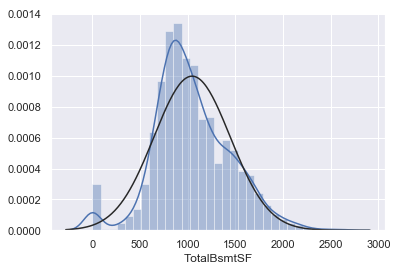

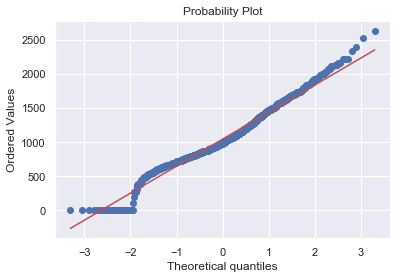

In [63]:
sns.distplot(housing['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['TotalBsmtSF'], plot=plt)

#### Replacing 0 with the average value ,because as 0 wont let us do the logarithmic transformation.

In [64]:
housing['TotalBsmtSF']=housing['TotalBsmtSF'].replace(0,np.average(housing['TotalBsmtSF']))

In [65]:
housing['TotalBsmtSF']=np.log(housing['TotalBsmtSF'])

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


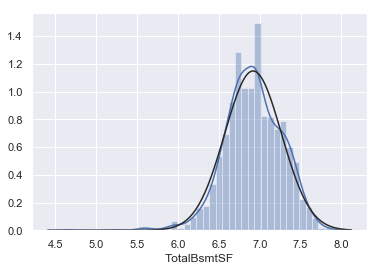

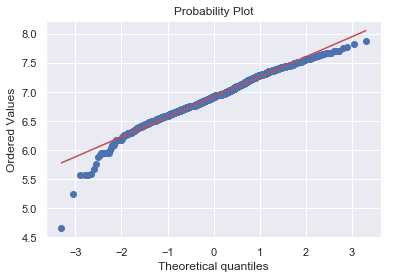

In [66]:
sns.distplot(housing['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(housing['TotalBsmtSF'], plot=plt)

In [67]:
housing.shape

(1449, 79)

## Data  Preparation.

In [68]:
Y=housing.pop('SalePrice')
X=housing

In [69]:
## creating dummy variables for categorical variables.
housing_cat=X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal


In [70]:
# transforming into dummy variables.
housing_dummy=pd.get_dummies(housing_cat, drop_first=True)
housing_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
X=X.drop(list(housing_cat.columns),axis=1)

In [72]:
## concating X and housing_dummy
X=pd.concat([X,housing_dummy],axis=1)

In [73]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


## Scaling the features.

In [74]:
from sklearn.preprocessing import scale
kols=X.columns
X=pd.DataFrame(scale(X))
X.columns=kols
X.columns

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [75]:
## Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model Building and Evaluations.

## Ridge and Lasso Regression.

In [76]:
## list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()
## Cross validation
folds=5
model_cv= GridSearchCV(estimator=ridge, param_grid=params ,scoring='neg_mean_absolute_error',
                       cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [77]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015813,0.003345,0.000688,0.001375,0.0001,{'alpha': 0.0001},-0.098172,-0.094695,-0.092837,-0.086603,...,-0.093770,0.004007,27,-0.055052,-0.057312,-0.056180,-0.058407,-0.057935,-0.056977,0.001218
1,0.013637,0.001638,0.000998,0.001546,0.001,{'alpha': 0.001},-0.098184,-0.094692,-0.092832,-0.086604,...,-0.093762,0.004004,26,-0.055052,-0.057312,-0.056179,-0.058407,-0.057935,-0.056977,0.001218
2,0.017841,0.003194,0.001598,0.001957,0.01,{'alpha': 0.01},-0.098285,-0.094667,-0.092774,-0.086606,...,-0.093688,0.003976,25,-0.055052,-0.057311,-0.056178,-0.058410,-0.057932,-0.056976,0.001218
3,0.013252,0.002319,0.001216,0.001606,0.05,{'alpha': 0.05},-0.098550,-0.094556,-0.092545,-0.086604,...,-0.093381,0.003909,24,-0.055052,-0.057309,-0.056178,-0.058421,-0.057926,-0.056977,0.001220
4,0.015701,0.004643,0.001253,0.001463,0.1,{'alpha': 0.1},-0.098680,-0.094423,-0.092304,-0.086585,...,-0.093063,0.003901,23,-0.055056,-0.057307,-0.056182,-0.058435,-0.057954,-0.056987,0.001226


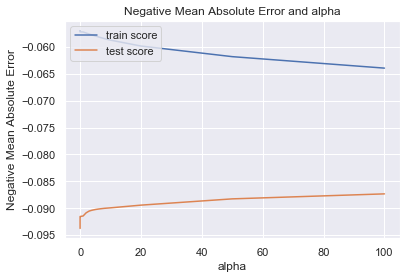

In [78]:
## plotting mean test and train score for aplha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
model_cv.best_score_

-0.08733957975319036

In [80]:
model_cv.best_params_

{'alpha': 100}

In [81]:
## Optimal value for alpha is 100 for ridge
alpha=100
ridge=Ridge(alpha)
ridge.fit(x_train,y_train)
ridge.coef_

array([-5.85011573e-03,  2.74612232e-02,  5.41593981e-02,  4.11927402e-02,
        2.90191142e-02,  1.92625352e-02,  8.29169410e-03,  2.52916482e-02,
        6.54805528e-03,  3.50375482e-03,  3.16025541e-02,  3.71079307e-02,
        2.70411751e-02,  1.18046226e-02,  5.11239914e-02,  8.33741113e-03,
       -5.52768882e-03,  1.99814828e-02,  1.56614983e-02,  5.94786558e-03,
       -1.44317985e-02,  1.77046024e-02,  1.17599486e-02, -5.42835544e-03,
        2.10753975e-02,  2.20283725e-02,  1.00139208e-02,  4.13841387e-03,
        5.89774946e-03,  4.07729706e-03,  1.14985249e-02,  4.57424054e-03,
        1.41329797e-03, -1.84430495e-03, -2.57459100e-03,  1.59740724e-02,
        7.79216818e-03,  3.04901076e-02,  8.77119018e-03,  7.08594869e-03,
       -4.60986534e-03, -5.61758188e-03,  2.28652010e-03,  4.15189608e-04,
       -5.59480188e-04, -5.54777332e-04, -8.00568045e-03, -3.51958645e-04,
       -4.03449228e-03,  6.00582394e-03, -5.42393974e-03, -1.23339202e-03,
       -5.23961777e-03,  

In [82]:
## predictions
y_train_pred=ridge.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9430880959227408
0.9182827529139239


### r2 score is good for both train and test data  so clearly no overfitting.

## LASSO regression.

In [83]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001, ]}


lasso= Lasso()
model_cv= GridSearchCV(estimator=lasso, param_grid=params , scoring='neg_mean_absolute_error',
                       cv=folds, return_train_score=True, verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178533,0.045793,0.001598,0.001957,0.0001,{'alpha': 0.0001},-0.097412,-0.091117,-0.090022,-0.082908,...,-0.090101,0.004636,6,-0.055423,-0.057555,-0.057015,-0.058949,-0.058270,-0.057442,0.001202
1,0.145514,0.065697,0.004888,0.006037,0.0002,{'alpha': 0.0002},-0.096501,-0.088217,-0.088754,-0.081349,...,-0.088350,0.004853,5,-0.055840,-0.057845,-0.057353,-0.059468,-0.058558,-0.057813,0.001217
2,0.094672,0.025181,0.002397,0.001957,0.0003,{'alpha': 0.0003},-0.095640,-0.085975,-0.087684,-0.080443,...,-0.086950,0.004965,4,-0.056316,-0.058324,-0.057919,-0.059927,-0.058844,-0.058266,0.001185
3,0.075318,0.008545,0.000799,0.001598,0.0004,{'alpha': 0.0004},-0.094986,-0.084114,-0.086772,-0.079630,...,-0.085930,0.005080,3,-0.056778,-0.058737,-0.058474,-0.060357,-0.059217,-0.058713,0.001163
4,0.071880,0.008346,0.001790,0.001822,0.0005,{'alpha': 0.0005},-0.094654,-0.083188,-0.086012,-0.079046,...,-0.085250,0.005206,2,-0.057189,-0.059045,-0.058886,-0.060697,-0.059600,-0.059084,0.001140


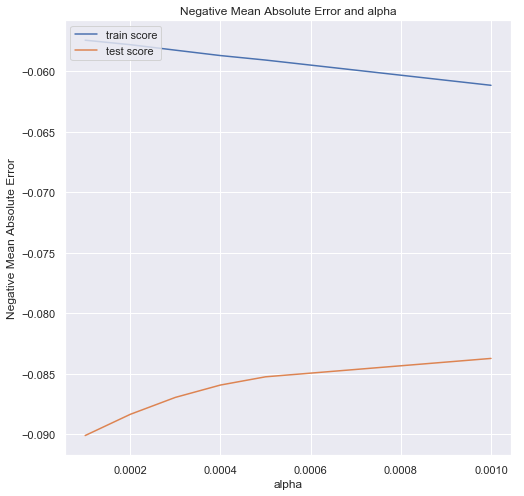

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(8,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
model_cv.best_score_

-0.08373128974849563

In [87]:
model_cv.best_params_

{'alpha': 0.001}

In [88]:
alpha=0.001

lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
lasso.coef_

array([-7.03444264e-03,  3.55508782e-02,  6.38715088e-02,  5.00446378e-02,
        6.35435172e-02,  1.55313220e-02,  4.65741458e-03,  2.51272407e-02,
        4.75685603e-03,  0.00000000e+00,  3.11462458e-02,  3.44170990e-02,
        3.15397307e-02,  9.03374591e-03,  8.16999942e-02,  8.64227819e-03,
       -3.83101792e-03,  1.18527882e-02,  8.60190340e-03,  0.00000000e+00,
       -1.47206952e-02,  1.05998112e-02,  8.01187964e-03, -5.46953960e-03,
        2.75515836e-02,  1.78025207e-02,  9.15529505e-03,  3.28937747e-03,
        7.70040002e-03,  2.58781773e-03,  1.12492305e-02,  0.00000000e+00,
        0.00000000e+00, -1.00110630e-04, -1.75945552e-04,  6.19644634e-02,
        2.89791897e-02,  1.16679571e-01,  7.46738675e-02,  5.11513909e-03,
       -2.51401181e-03, -1.78121573e-03,  1.02425694e-04,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.56535847e-03,  0.00000000e+00,
       -2.80963779e-03,  4.86166947e-03, -3.66732086e-03, -2.77515283e-04,
       -4.99808833e-03,  

In [90]:
# prediction
y_train_pred=ridge.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.9430880959227408
0.9182827529139239


In [91]:
main_coef=pd.Series(lasso.coef_,index=x_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  176


In [92]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

MSZoning_RL        0.116680
GrLivArea          0.081700
MSZoning_RM        0.074674
OverallQual        0.063872
YearBuilt          0.063544
MSZoning_FV        0.061964
OverallCond        0.050045
LotArea            0.035551
1stFlrSF           0.034417
2ndFlrSF           0.031540
Functional_Sev    -0.008296
BldgType_Twnhs    -0.008711
SaleType_WD       -0.009701
Condition1_PosA   -0.011586
Functional_Maj2   -0.012064
LandSlope_Sev     -0.013436
KitchenAbvGr      -0.014721
Heating_Grav      -0.016029
KitchenQual_TA    -0.032246
KitchenQual_Gd    -0.032364
dtype: float64

## Most signifcant features in predicting the price of house.

### 1) GrLivArea

### 2) MSZononig_RL

### 3) OverallQual

### 4) YearBuilt 

### 5) OverallCond

### 6) MSZoning_FV

### 7) MSZoning_RM

### 8) SaleCondition_Partial

### 9) BsmtFinSF1

### 10) 2ndFlrSF



In [ ]:
x